# AUTHOR: MAHRUKH KHAN
## TASK: 2
* From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.
* Use R or Python or perform this task
* Dataset : https://bit.ly/3kXTdox


## **SETUP:**

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn import metrics
print("Setup Complete")

Setup Complete


## **Data Collection:**

In [2]:
#Reading data
iris_df = pd.read_csv("../input/irisdataset/Iris.csv")
print("Data import successful")
iris_df.shape

Data import successful


(150, 6)

In [3]:
iris_df.head() # See the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## **Data Visualization:**

In [4]:
iris_df["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

> **BOXPLOTS**

(<AxesSubplot:title={'center':'Sepal Length -BoxPlot'}, xlabel='Species', ylabel='SepalLengthCm'>,
 Text(0.5, 1.0, 'Sepal Length -BoxPlot'))

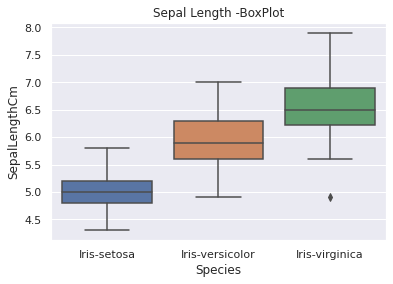

In [5]:
sns.set(style = "darkgrid")
sns.boxplot(x='Species', y='SepalLengthCm', data=iris_df), plt.title('Sepal Length -BoxPlot')

(<AxesSubplot:title={'center':'Sepal Width -BoxPlot'}, xlabel='Species', ylabel='SepalWidthCm'>,
 Text(0.5, 1.0, 'Sepal Width -BoxPlot'))

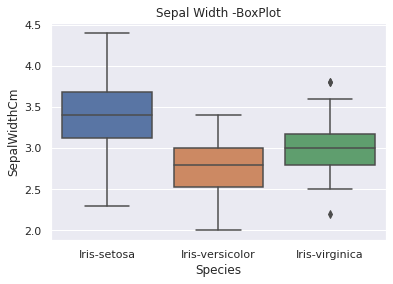

In [6]:
sns.boxplot(x='Species', y='SepalWidthCm', data=iris_df), plt.title('Sepal Width -BoxPlot')

(<AxesSubplot:title={'center':'Petal Length -BoxPlot'}, xlabel='Species', ylabel='PetalLengthCm'>,
 Text(0.5, 1.0, 'Petal Length -BoxPlot'))

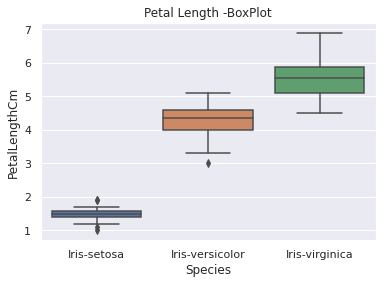

In [7]:
sns.boxplot(x='Species', y='PetalLengthCm', data=iris_df), plt.title('Petal Length -BoxPlot')

(<AxesSubplot:title={'center':'Petal Width -BoxPlot'}, xlabel='Species', ylabel='PetalWidthCm'>,
 Text(0.5, 1.0, 'Petal Width -BoxPlot'))

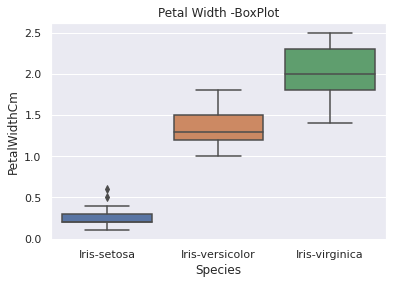

In [8]:
sns.boxplot(x='Species', y='PetalWidthCm', data=iris_df), plt.title('Petal Width -BoxPlot')

> **SCATTER PLOTS**

(<AxesSubplot:title={'center':'Sepal Length -ScatterPlot'}, xlabel='SepalLengthCm', ylabel='SepalLengthCm'>,
 Text(0.5, 1.0, 'Sepal Length -ScatterPlot'))

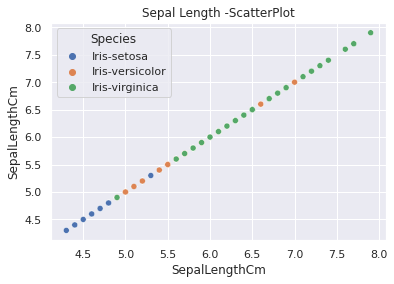

In [9]:
sns.scatterplot(x='SepalLengthCm', y='SepalLengthCm', hue='Species', data=iris_df), plt.title('Sepal Length -ScatterPlot')

(<AxesSubplot:title={'center':'Sepal Width -ScatterPlot'}, xlabel='SepalWidthCm', ylabel='SepalWidthCm'>,
 Text(0.5, 1.0, 'Sepal Width -ScatterPlot'))

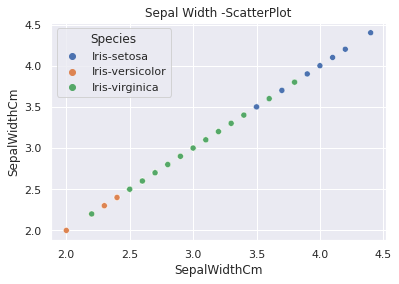

In [10]:
sns.scatterplot(x='SepalWidthCm', y='SepalWidthCm', hue='Species', data=iris_df), plt.title('Sepal Width -ScatterPlot')

(<AxesSubplot:title={'center':'Petal Length -ScatterPlot'}, xlabel='PetalLengthCm', ylabel='PetalLengthCm'>,
 Text(0.5, 1.0, 'Petal Length -ScatterPlot'))

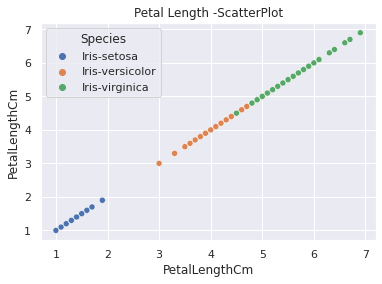

In [11]:
sns.scatterplot(x='PetalLengthCm', y='PetalLengthCm', hue='Species', data=iris_df), plt.title('Petal Length -ScatterPlot')

(<AxesSubplot:title={'center':'Petal Width -ScatterPlot'}, xlabel='PetalWidthCm', ylabel='PetalWidthCm'>,
 Text(0.5, 1.0, 'Petal Width -ScatterPlot'))

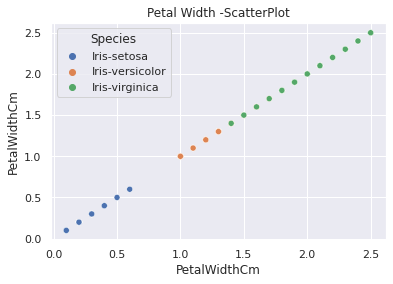

In [12]:
sns.scatterplot(x='PetalWidthCm', y='PetalWidthCm', hue='Species', data=iris_df), plt.title('Petal Width -ScatterPlot')

## **K-MEANS CLUSTERING:**
**To find optimum number of clusters, Elbow Method is applied using K-means Classification**

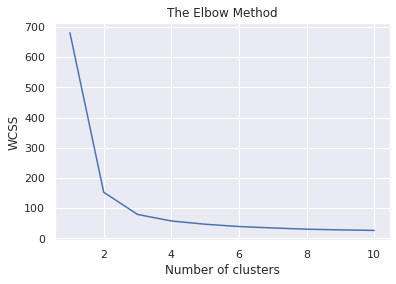

In [13]:
x = iris_df.iloc[:, 1:5].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph to observe 'the elbow'
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Hence, the optimum number of clusters is where the elbow occurs i.e 3

In [14]:
#Applying kmeans to the dataset - Kmeans Classification
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

## **Visualization of Clusters:**

> ## **2d Scatterplot:**

Using just the first two columns for this 2d plot, SepalLengthCm and SepalWidthCm

Text(0.5, 1.0, '2D SCATTERPLOT VISUALIZATION OF CLUSTERS')

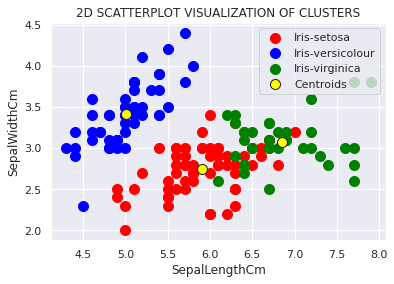

In [15]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.xlabel("SepalLengthCm"),plt.ylabel("SepalWidthCm")
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],edgecolor='k', s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.title("2D SCATTERPLOT VISUALIZATION OF CLUSTERS")

> ## **3d Scatterplot:**

Using just the last three columns for this 3d plot, SepalWidthCm, PetalLengthCm and PetalWidthCm

In [16]:
#data preparation
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
iris_df['Labels'] =  labels
x = iris_df['SepalWidthCm']
y = iris_df['PetalLengthCm']
z = iris_df['PetalWidthCm']
centroid1 = kmeans.cluster_centers_[:,0]
centroid2 = kmeans.cluster_centers_[:,1]
centroid3 = kmeans.cluster_centers_[:,2]

> Visualizing through MATPLOTLIB

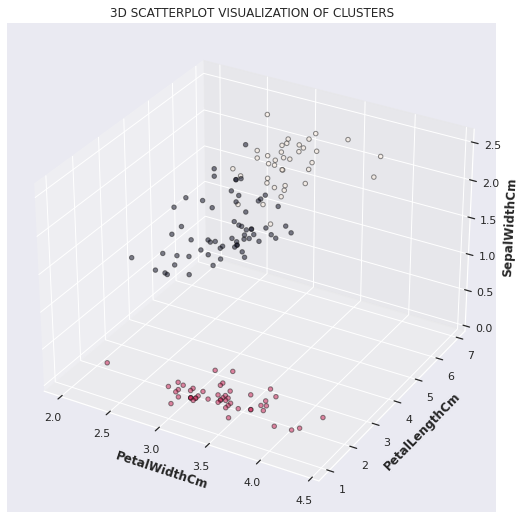

In [17]:
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
ax.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.3, alpha = 0.2)

sctt = ax.scatter3D(x,y,z, c= iris_df['Labels'], edgecolor='k', alpha = 0.5)

plt.title("3D SCATTERPLOT VISUALIZATION OF CLUSTERS")
ax.set_xlabel('PetalWidthCm', fontweight ='bold')
ax.set_ylabel('PetalLengthCm', fontweight ='bold')
ax.set_zlabel('SepalWidthCm', fontweight ='bold')
plt.show()

> Visualizing through PLOTLY

In [18]:
plot3d = go.Scatter3d(
     x = iris_df['SepalWidthCm'],
     y = iris_df['PetalLengthCm'],
     z = iris_df['PetalWidthCm'],
mode = 'markers',
marker = dict(color = iris_df['Labels'], size= 20,line=dict(color= iris_df['Labels'],width= 12), opacity=0.8))
data = [plot3d]
layout = go.Layout(title= '3D SCATTERPLOT VISUALIZATION OF CLUSTERS',
                   scene = dict(xaxis = dict(title  = 'SepalWidthCm'),
                                yaxis = dict(title  = 'PetalLengthCm'),
                                zaxis = dict(title  = 'PetalWidthCm')))
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)